## Рассмотрим распределение Лапласа
$ f(x) = \frac{1}{2}\exp^{-|x|}$


## Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

C:\Users\damir\AppData\Local\Temp\ipykernel_15336\2732666107.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Зададим конфигурацию графикам

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 14

## № 1

In [3]:
laplace = stats.laplace(22)
sizes: tuple = (10, 100, 10**4)

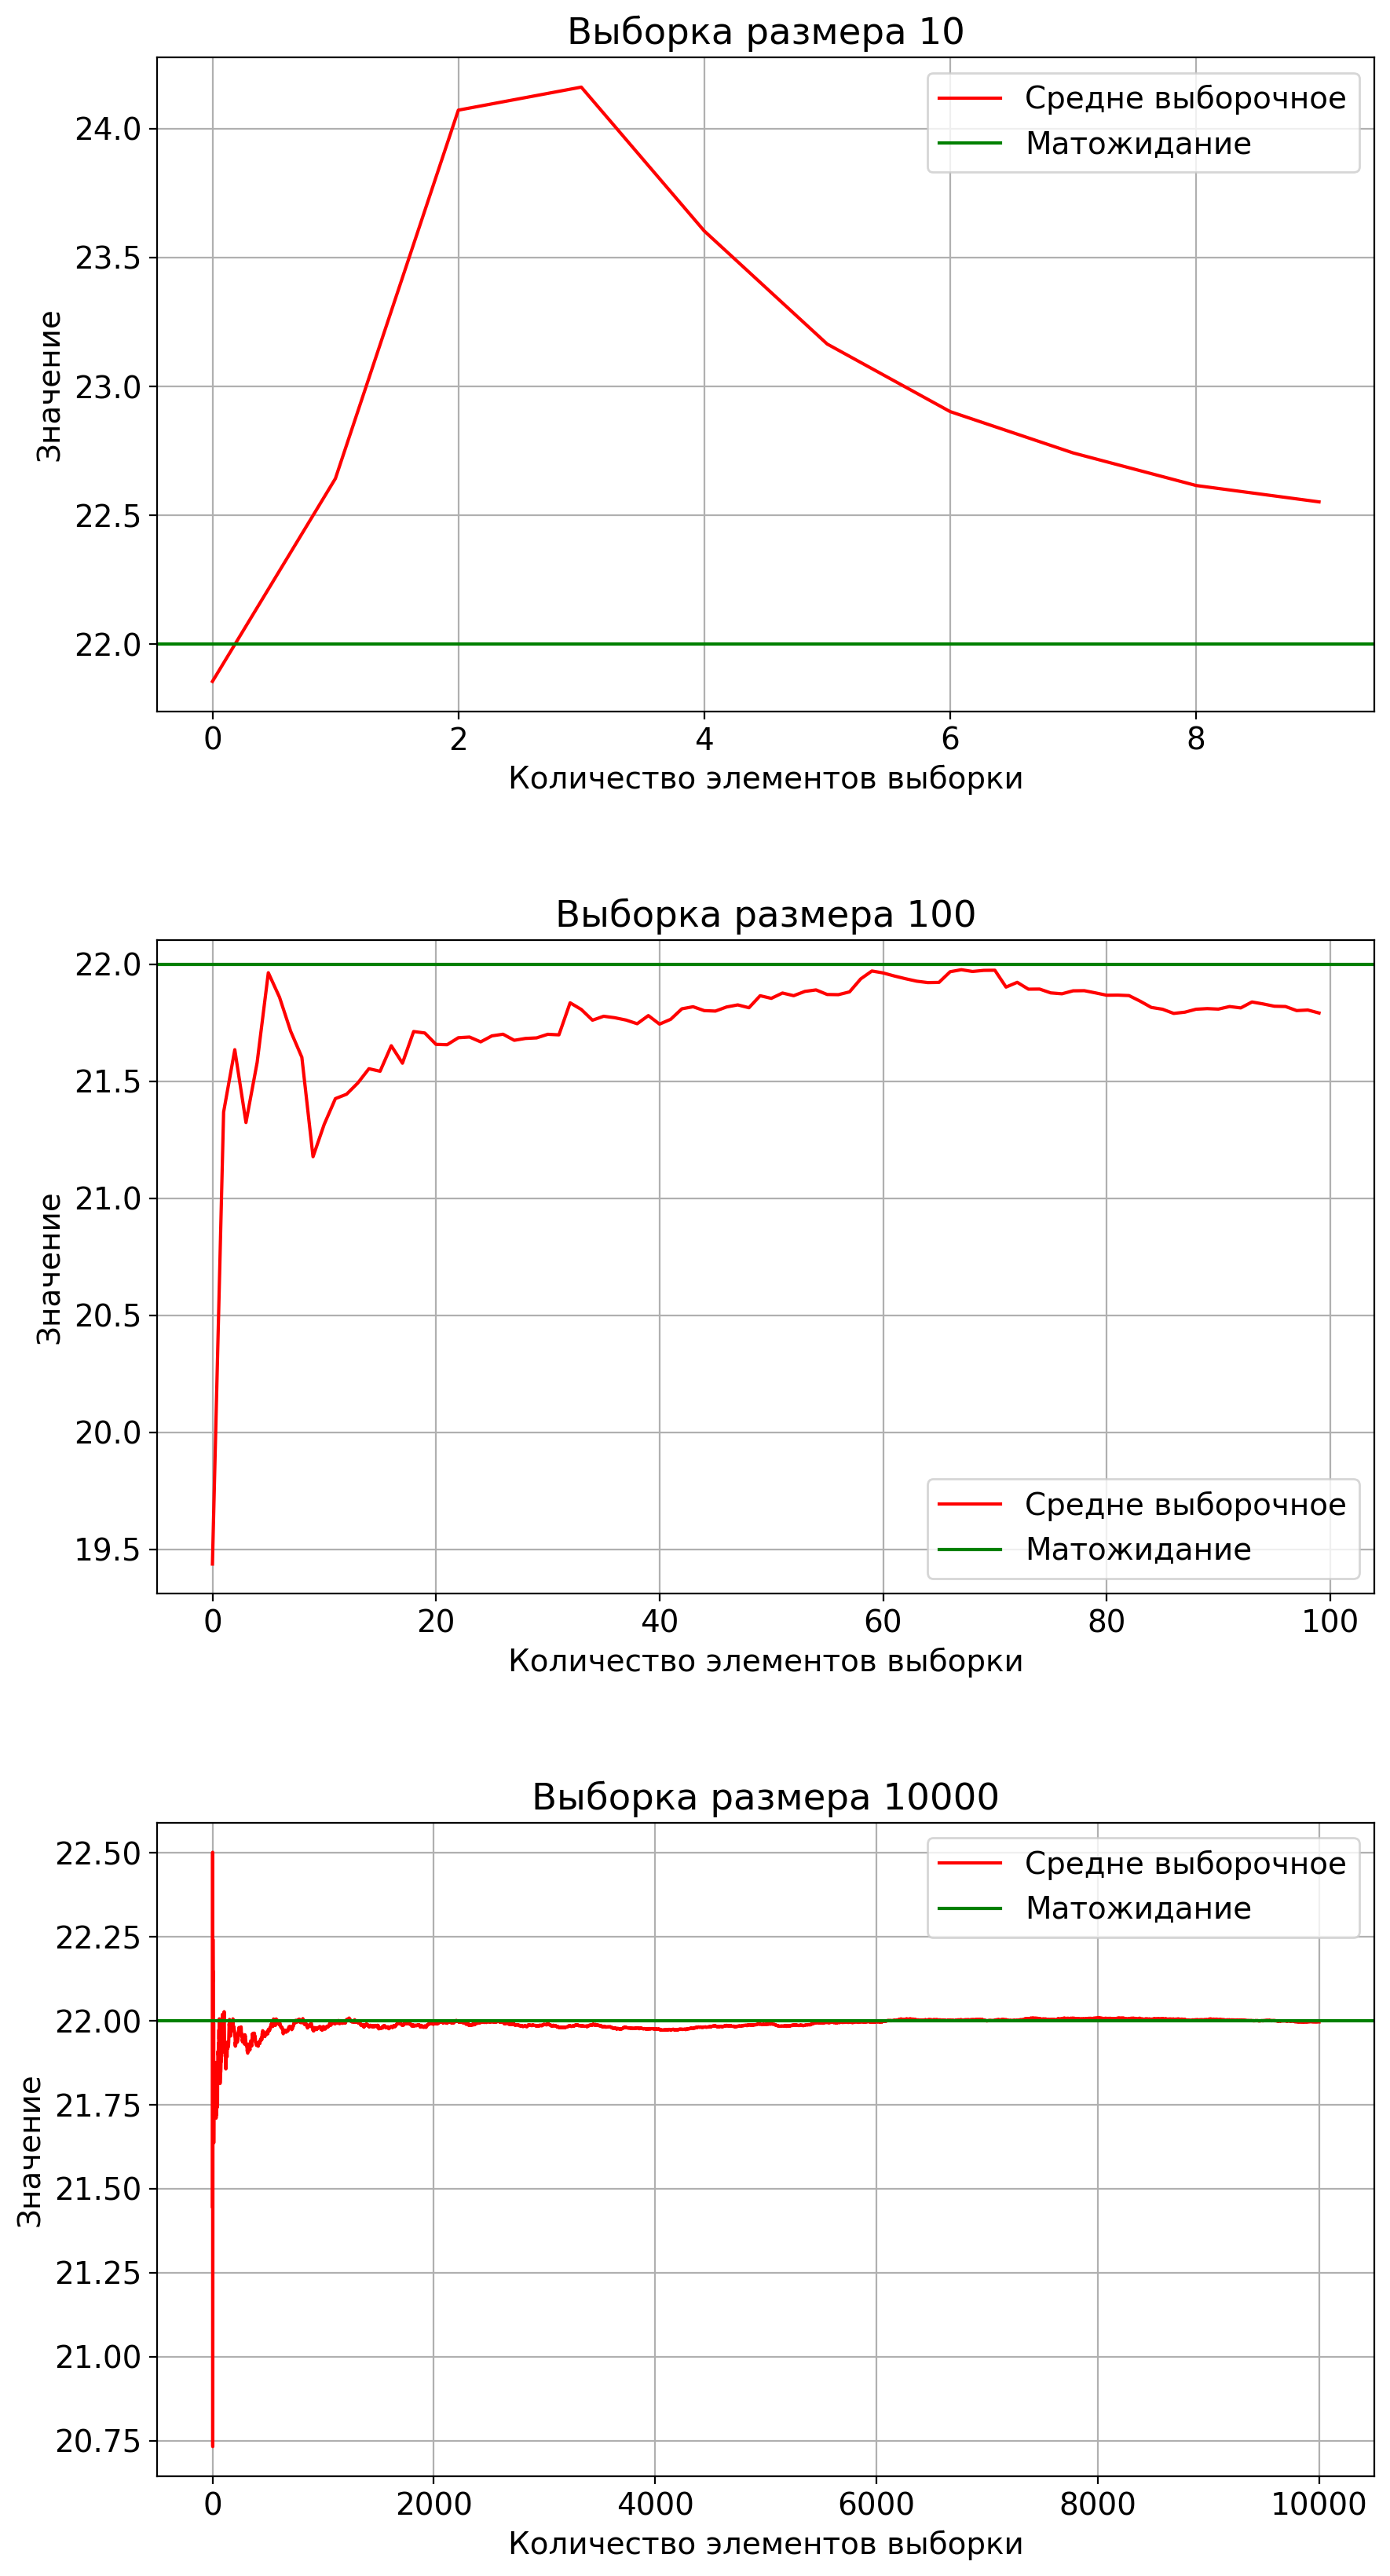

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(10, 20))
for i, size in enumerate(sizes):
    x = laplace.rvs(size)
    x_cumsum = np.cumsum(x)
    mean = x_cumsum / np.arange(1, size+1)


    ax[i].plot(mean, color='red', label='Средне выборочное')
    ax[i].axhline(22, color='green', label='Матожидание')
    ax[i].legend()
    ax[i].set_xlabel('Количество элементов выборки')
    ax[i].set_ylabel('Значение')
    ax[i].set_title(f'Выборка размера {size}')
    ax[i].grid()

plt.subplots_adjust(hspace=0.35)
plt.show()

### Из графиков видно, что при увеличении размера выборки выброчное среднее сходится к матожиданию

## № 2

### Проверим выполнение ЦПТ

In [5]:
count: int = 10**5
x_sum = laplace.rvs(count)

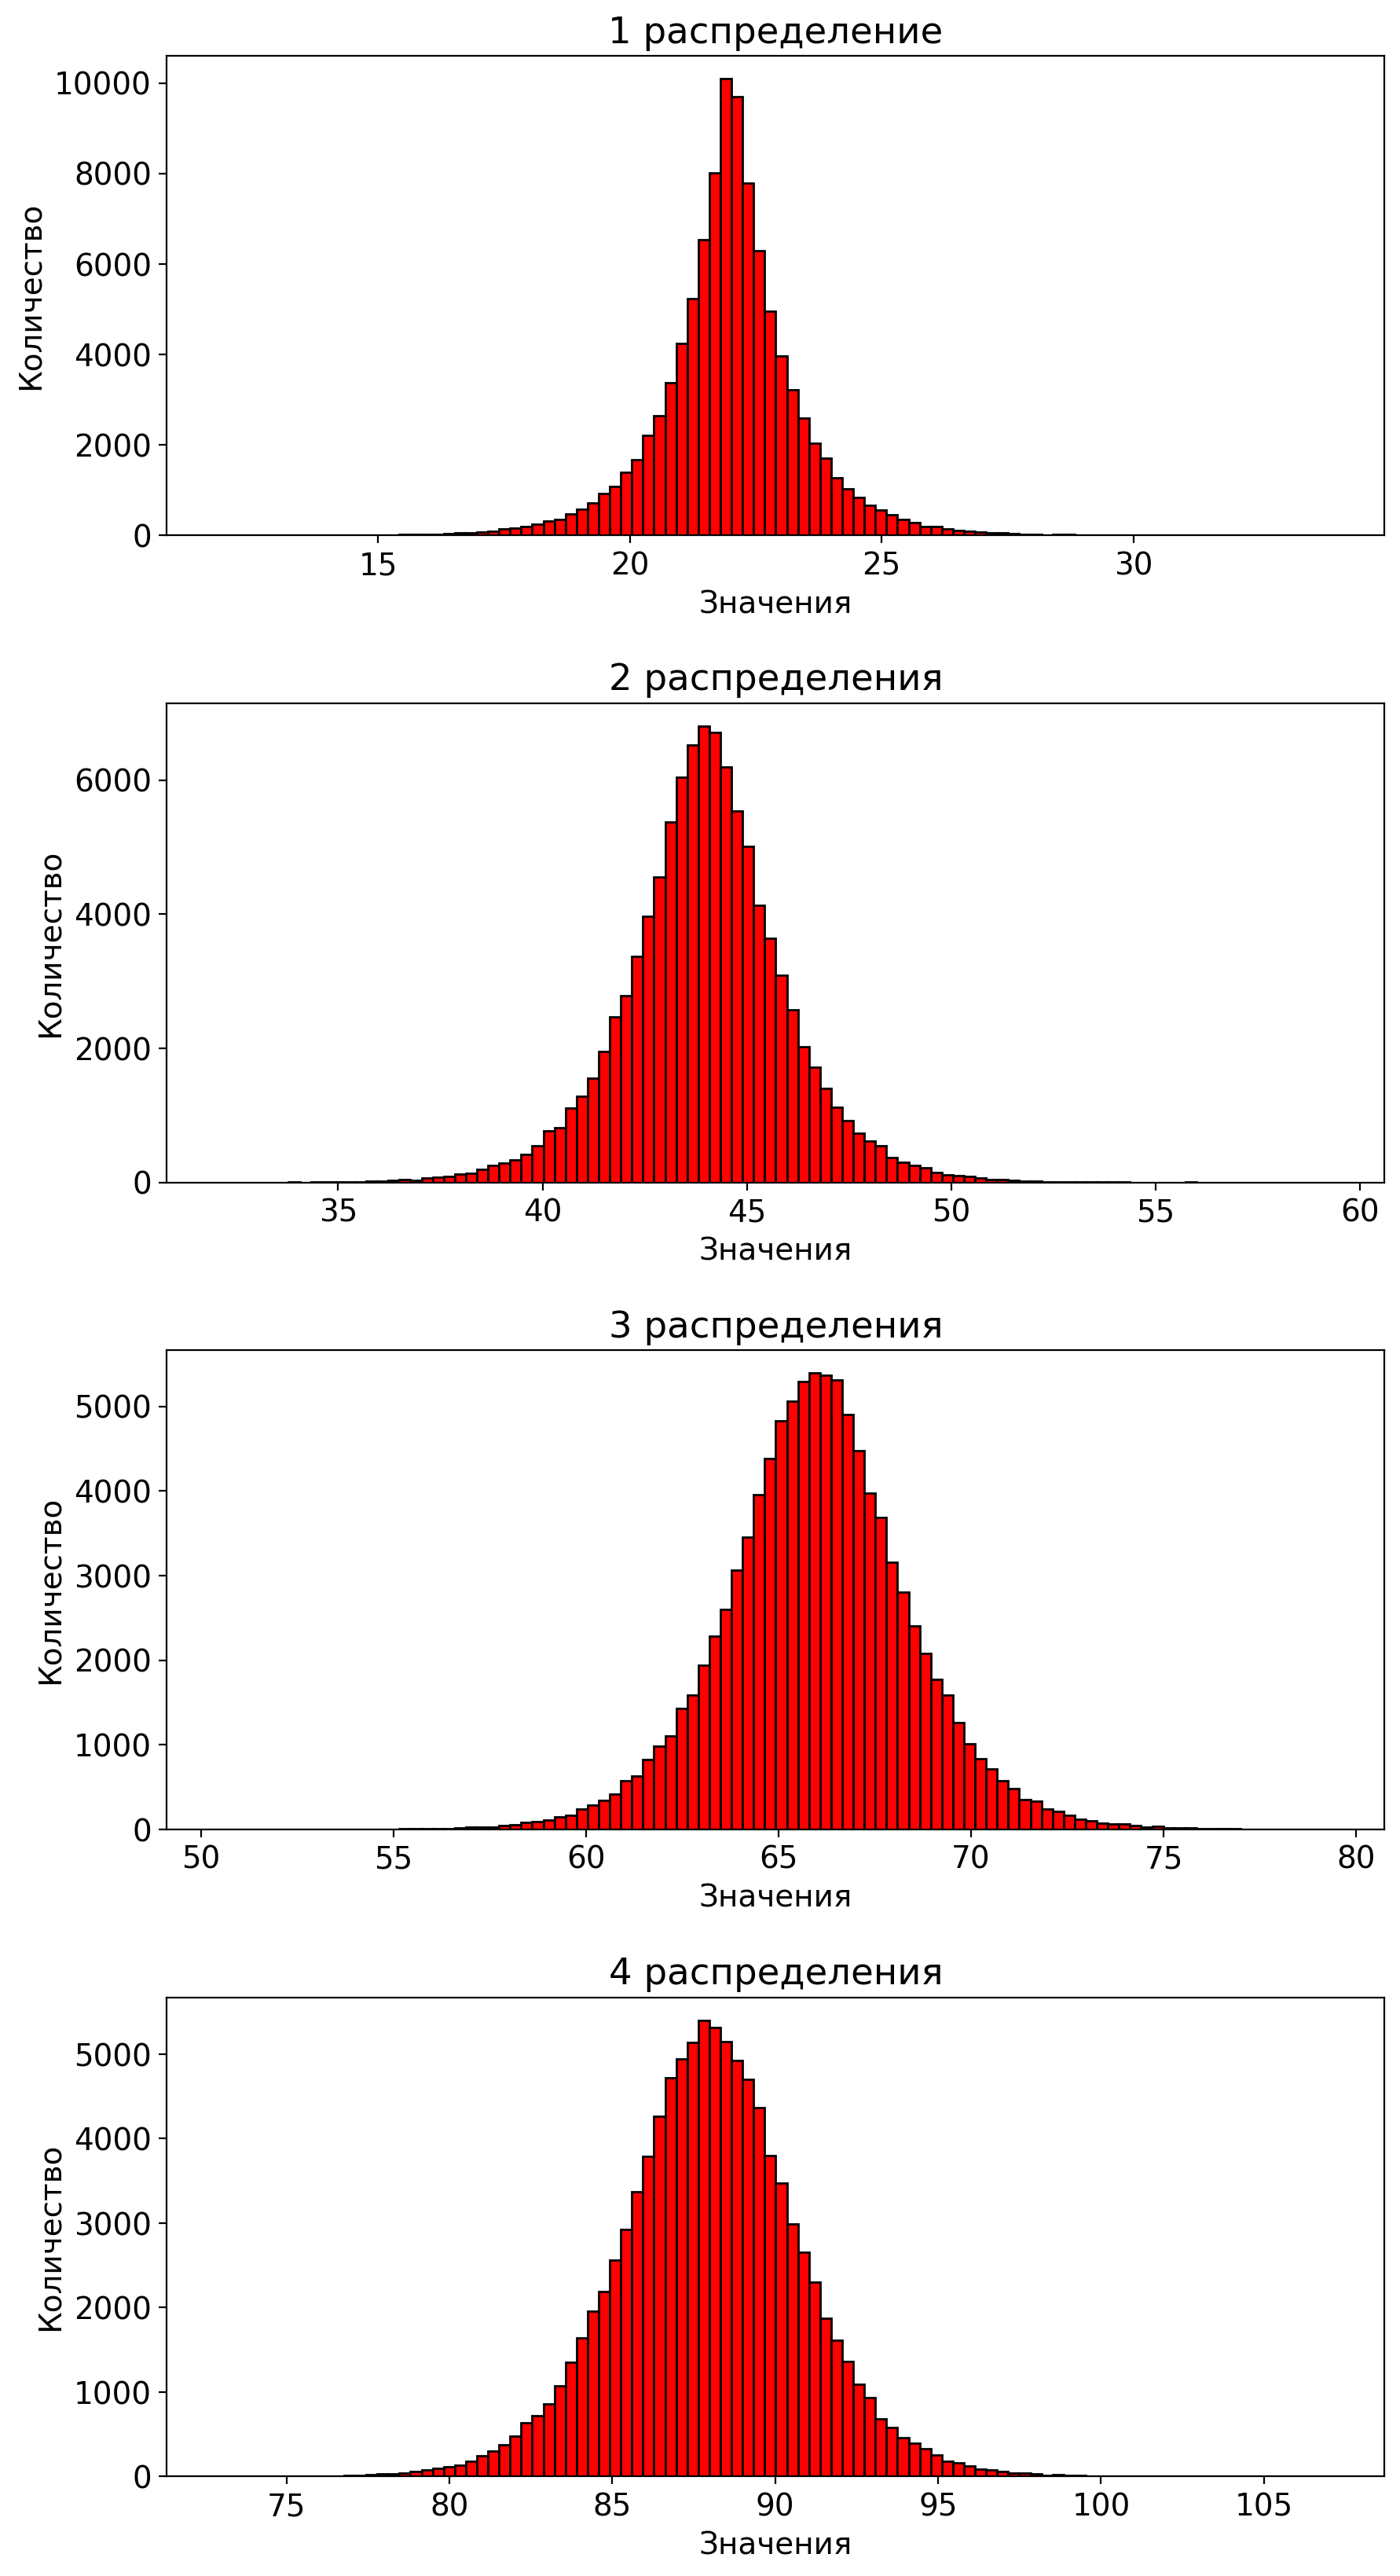

In [6]:
fig, ax = plt.subplots(4, 1, figsize=(10, 20))
ax[0].hist(x_sum, bins=100, color='red', edgecolor='black')
ax[0].set_xlabel('Значения')
ax[0].set_ylabel('Количество')
ax[0].set_title('1 распределение')
for i in range(1, 4):
    x = laplace.rvs(count)
    x_sum += x
    ax[i].hist(x_sum, bins=100, color='red', edgecolor='black')
    ax[i].set_xlabel('Значения')
    ax[i].set_ylabel('Количество')
    ax[i].set_title(f'{i + 1} распределения')

plt.subplots_adjust(hspace=0.35)
plt.show()

### Из графиков видно, что cумма распределений сходится к нормальному

## Доп номера

In [7]:
def confidence_interval(alpha, mean, std, diff):
    linspace = np.linspace(mean - diff, mean + diff)
    norm = stats.norm(mean, std).pdf(linspace)

    plt.figure()
    plt.plot(linspace, norm, color='green', label='Распределение')
    plt.ylabel('Значения')
    plt.xlabel('X')
    left, right = stats.norm.interval(1 - alpha, mean, std)
    for side in (left, right):
        plt.axvline(side, ymin=0.045, color="red", label=str(round(side, 2)))
        if side == left:
            x_edge = np.linspace(mean - diff, left)
        else:
            x_edge = np.linspace(right, mean + diff)

        y_edge = stats.norm(mean, std).pdf(x_edge)

        plt.fill_between(x_edge, 0, y_edge, color="pink", alpha=0.3)
    plt.grid()
    plt.legend()
    plt.plot()

    return left, right


## Ассимптотические интервалы

In [8]:
alpha: float = 5e-2
statistics: list = []
data: dict = {
    'Размер': sizes,
    'Шир. Асс. инт.': [],
    'Шир. Точ. инт.': []
    }

Размер выборки: 10
Границы 20.65 23.1
Ширина 2.45

Размер выборки: 100
Границы 19.36 24.53
Ширина 5.17

Размер выборки: 10000
Границы 19.21 24.79
Ширина 5.58



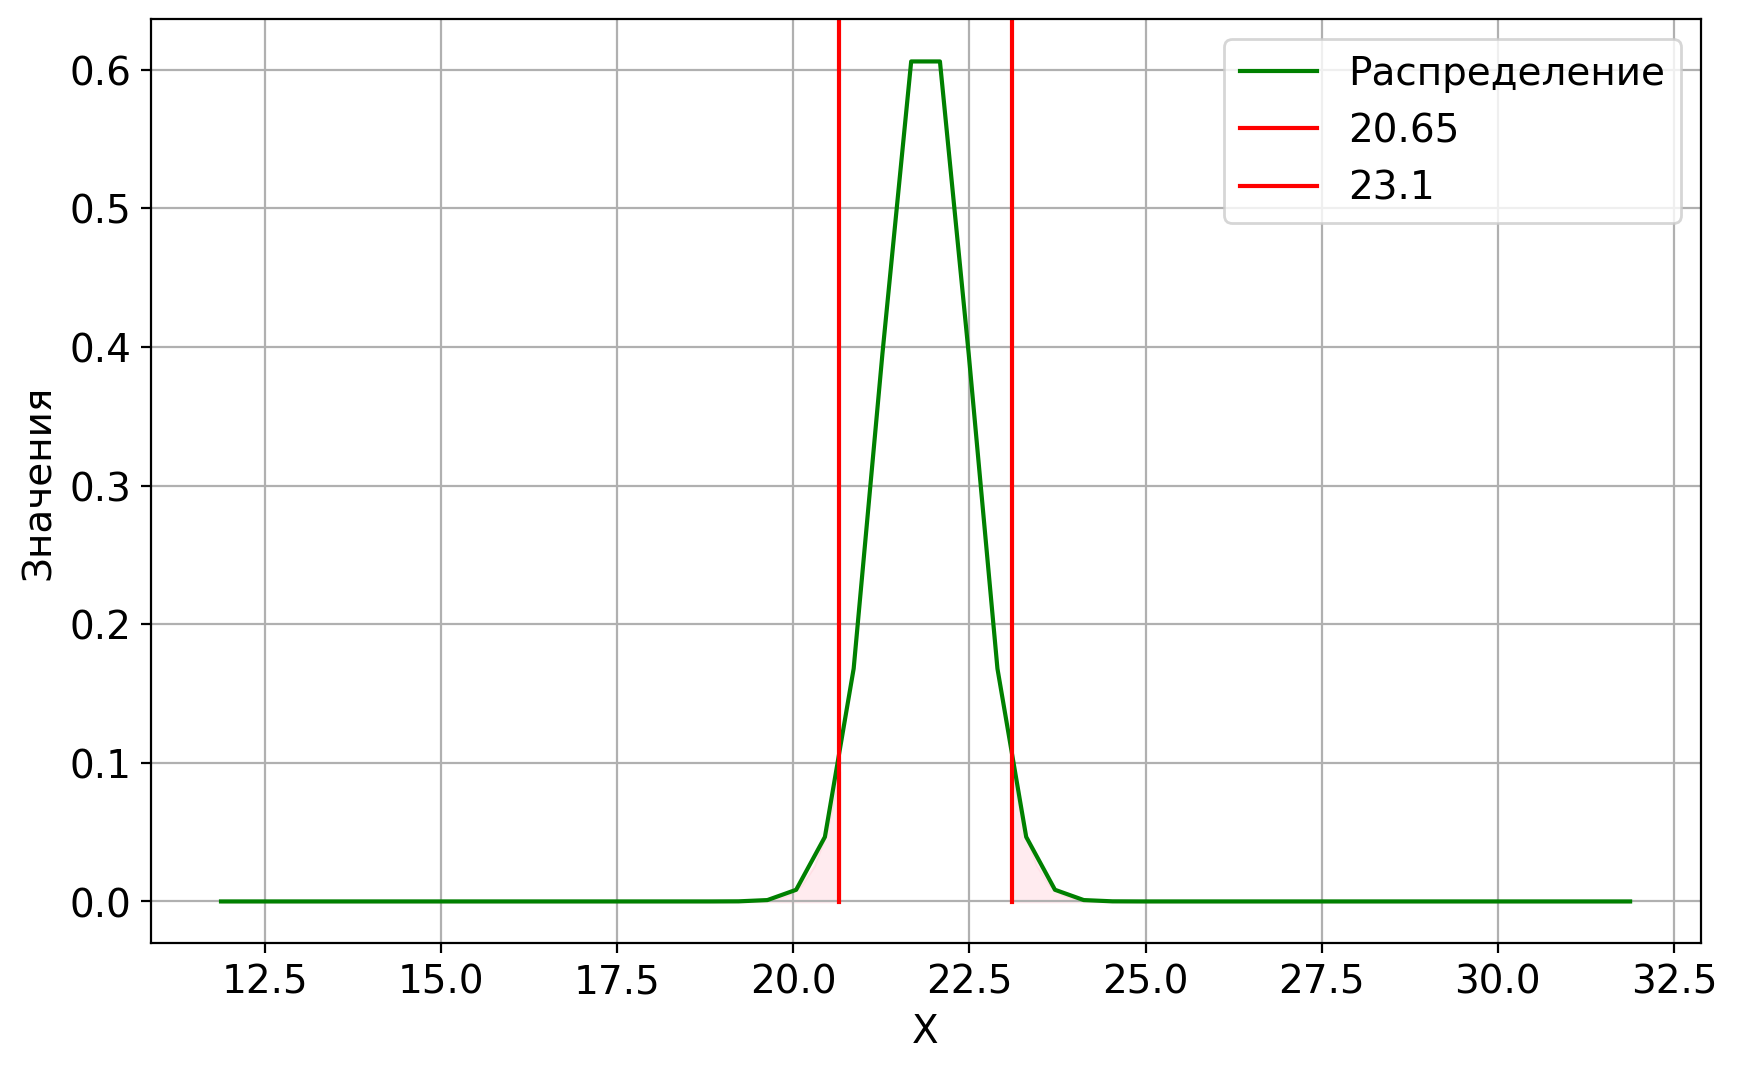

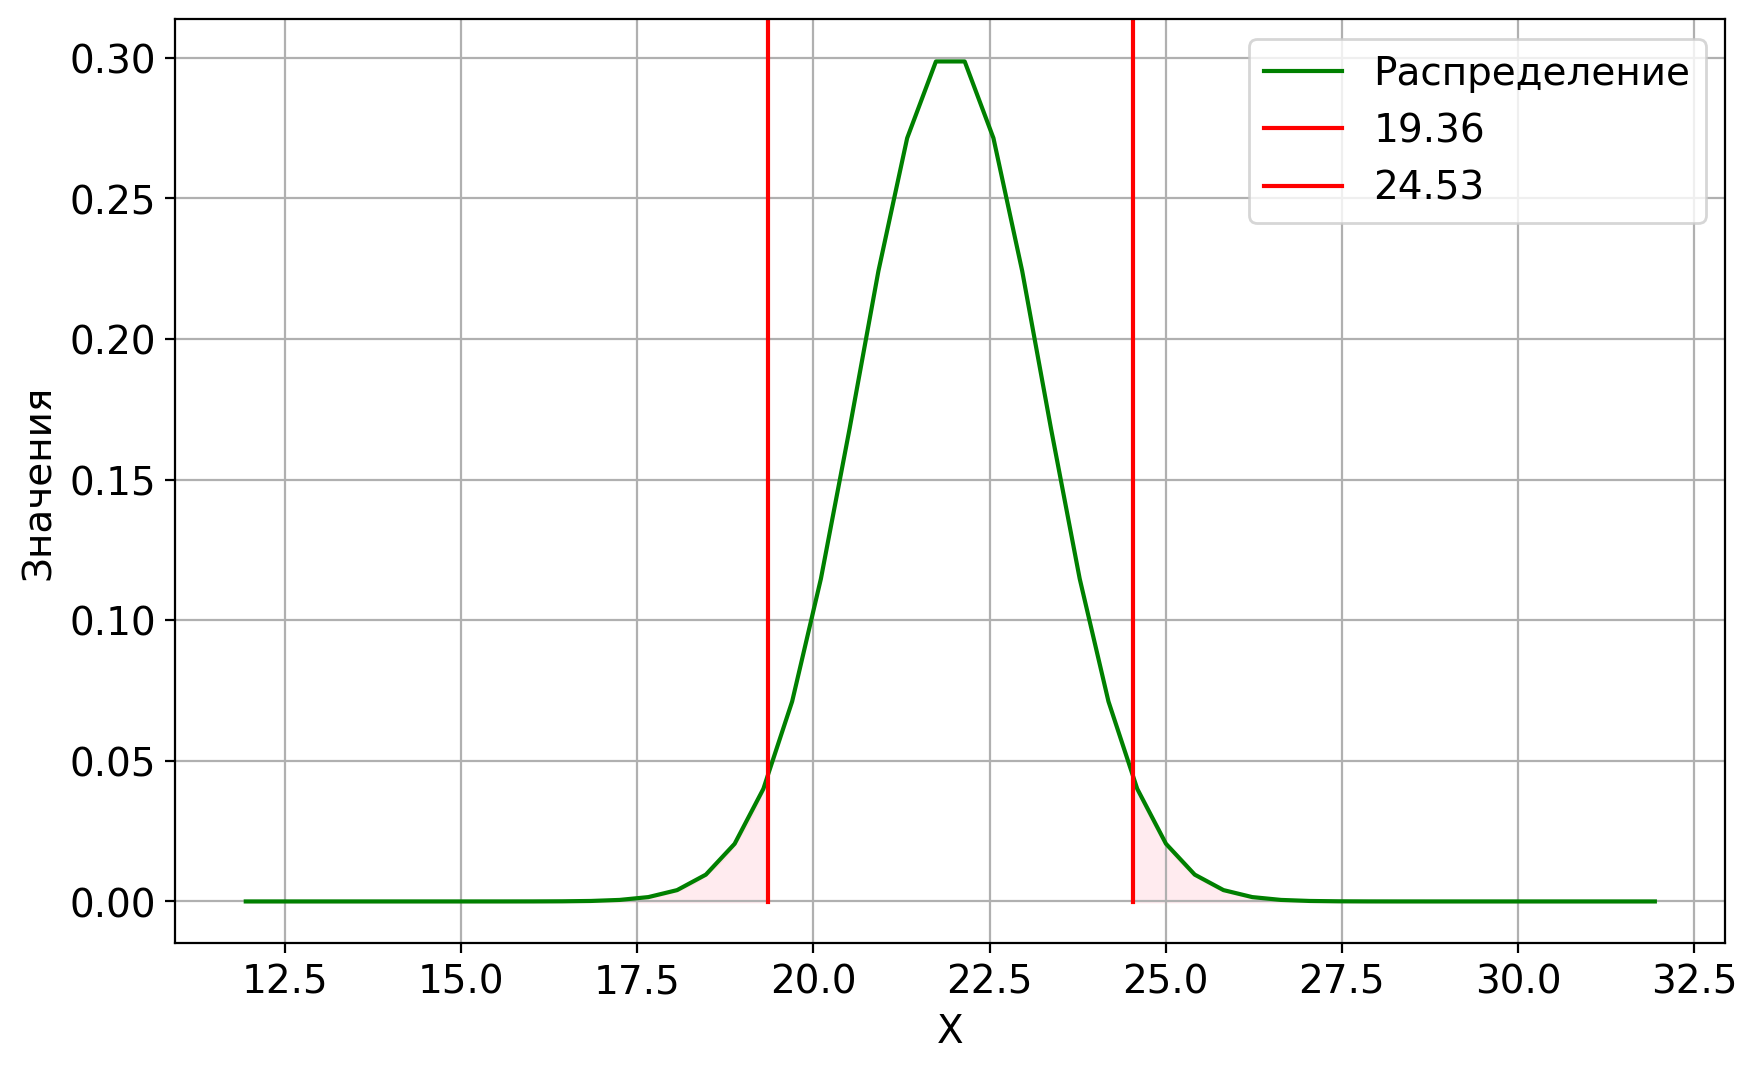

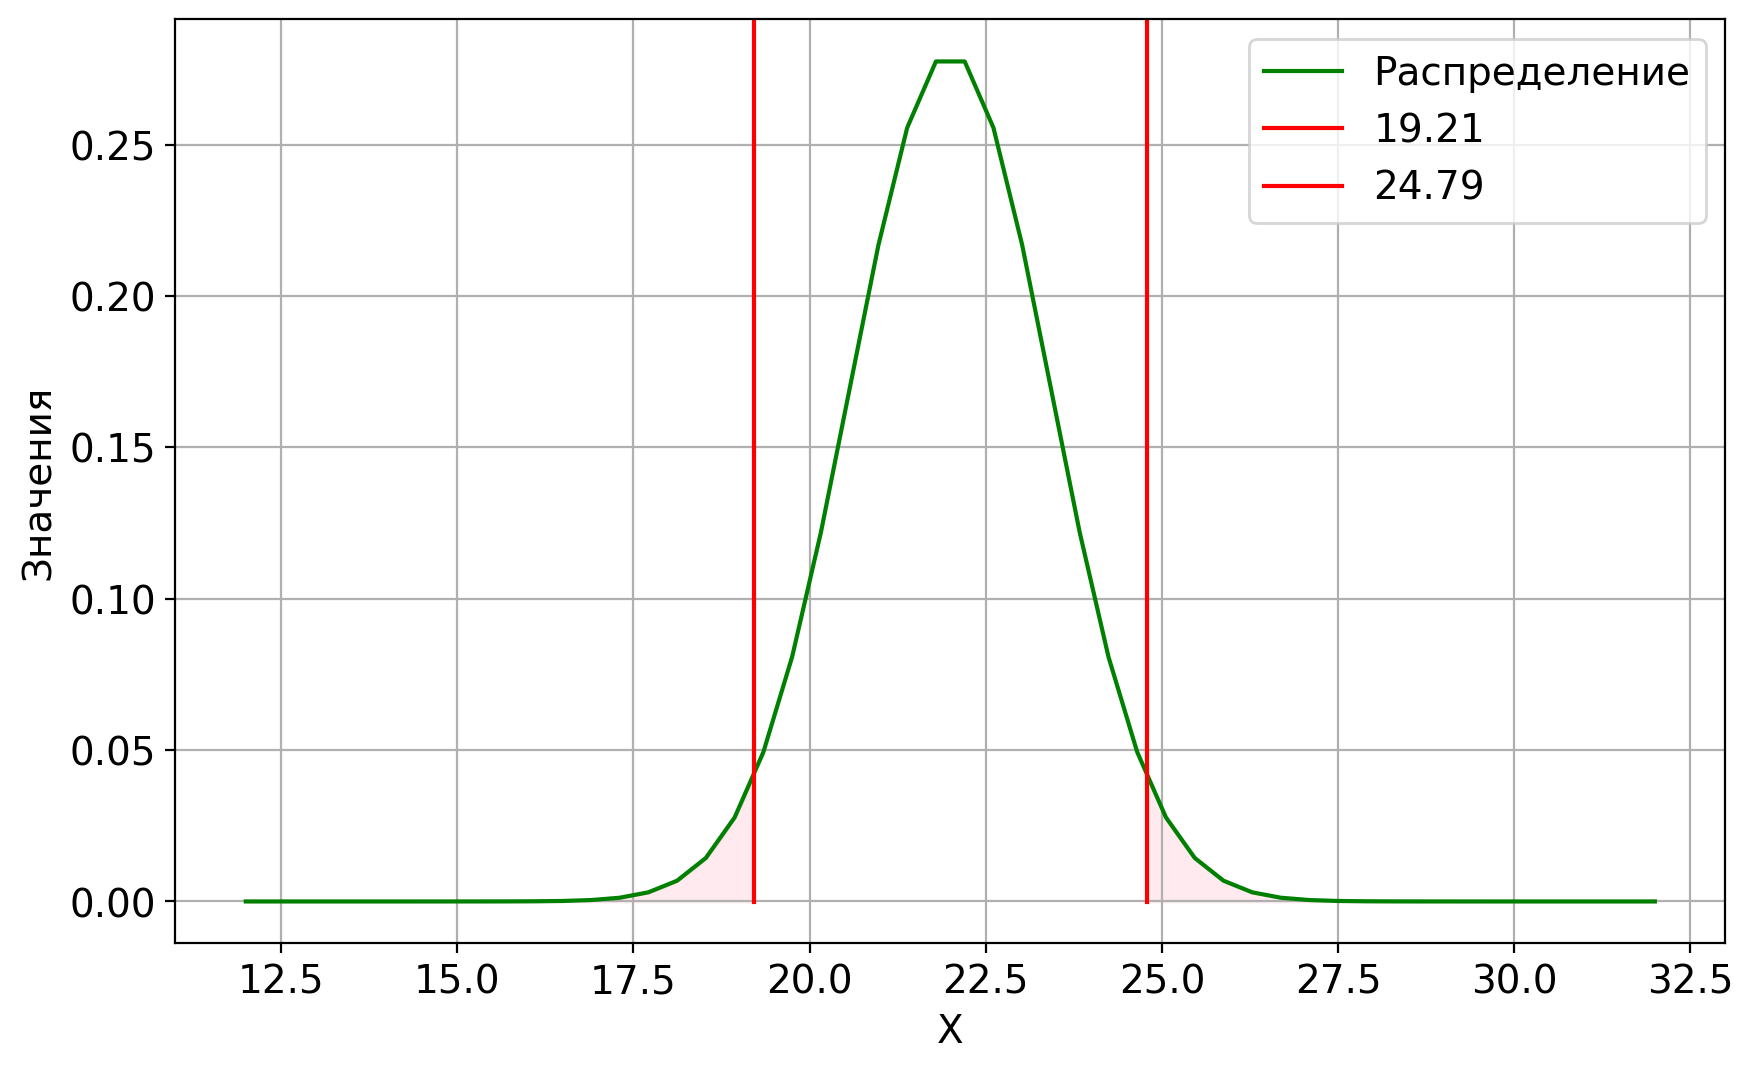

In [9]:
for size in sizes:
    x = laplace.rvs(size)
    mean = x.mean(axis=0)
    std = (((x - mean)**2).mean(axis=0))**0.5
    statistics.append((mean, std))

    left, right = confidence_interval(alpha, mean, std, 10)
    width = round(right - left, 2)
    data['Шир. Асс. инт.'].append(width)
    print(f'Размер выборки: {size}')
    print('Границы', round(left, 2), round(right, 2))
    print('Ширина', width)
    print()

## Точные интервалы

In [10]:
alpha: float = 5e-2
for i, size in enumerate(sizes):
    t_rv = stats.t(size-1)
    t_critic = t_rv.ppf(1 - alpha / 2)
    mean, std = statistics[i]

    left = mean - (t_critic * std**2)
    right = mean + (t_critic * std**2)
    width = round(right - left, 2)
    data['Шир. Точ. инт.'].append(width)
    print(f'Размер выборки: {size}')
    print('Границы', round(left, 2), round(right, 2))
    print('Ширина', width)
    print()

Размер выборки: 10
Границы 21.0 22.76
Ширина 1.76

Размер выборки: 100
Границы 18.49 25.4
Ширина 6.91

Размер выборки: 10000
Границы 18.03 25.97
Ширина 7.94



### Из графиков и  видно, выводов что точные интервалы всегда шире ассимптотических

In [11]:
data = pd.DataFrame(data)

In [12]:
data

,Размер,Шир. Асс. инт.,Шир. Точ. инт.
0,10,2.45,1.76
1,100,5.17,6.91
2,10000,5.58,7.94
